Statistical Visualisations

In [1]:
## Histogram of Word Counts

import pandas as pd
import plotly.express as px

# Load the dataset
data = pd.read_csv(r"main.csv")

# Assuming the main text is in a column named 'cleaned'
# Calculate word count and character count
data['word_count'] = data['cleaned'].apply(lambda x: len(str(x).split()))
data['char_count'] = data['cleaned'].apply(lambda x: len(str(x)))

# Plotting histograms using Plotly Express
fig_word_count = px.histogram(data, x='word_count',
                              title='Histogram of Word Counts',
                              labels={'word_count': 'Word Count'},
                              color_discrete_sequence=['skyblue'],
                              template='plotly_white',
                              nbins=30)
fig_word_count.update_layout(bargap=0)
fig_word_count.show()






C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:

## Histogram of Character Counts


fig_char_count = px.histogram(data, x='char_count',
                              title='Histogram of Character Counts',
                              labels={'char_count': 'Character Count'},
                              color_discrete_sequence=['lightgreen'],
                              template='plotly_white',
                              nbins=30)
fig_char_count.update_layout(bargap=0)
fig_char_count.show()


Visualization of Part-of-Speech (POS) Tag Frequencies

In [3]:
## Visualization of POS Tag Frequencies

import pandas as pd
import nltk
from nltk import pos_tag, word_tokenize
from collections import Counter
import plotly.express as px

# Ensure necessary resources are downloaded
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

# Load the dataset
data = pd.read_csv(r"main.csv")

def get_pos_tags(texts, tagset='universal'):
    df_list = []  # List to store each row DataFrame
    # Iterate over each text item
    for text in texts:
        pos_tags = Counter([tag for _, tag in pos_tag(word_tokenize(text), tagset=tagset)])
        # Create a DataFrame for current text's POS tags and add to list
        df_list.append(pd.DataFrame([pos_tags]))
    # Concatenate all DataFrames in the list into a single DataFrame
    df = pd.concat(df_list, ignore_index=True)
    df = df.fillna(0).astype(int)
    return df

# Extract POS tags for the 'cleaned' column
df_tags = get_pos_tags(data['cleaned'])

# Plotting each POS tag frequency using Plotly
def plot_pos_histograms(df):
    for column in df.columns:
        
        fig = px.histogram(df, x=column, title=f'Histogram of {column} Tags',
                           labels={column: f'Count of {column}'}, 
                           template='plotly_white', nbins=8)
        fig.update_traces(marker_color='turquoise', marker_line_width=1.5)
        fig.update_layout(bargap=0)  # Update bargap to 0 for no gaps
        
        fig.show()

plot_pos_histograms(df_tags)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\shruthi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shruthi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Normal Distribution for Title Lengths

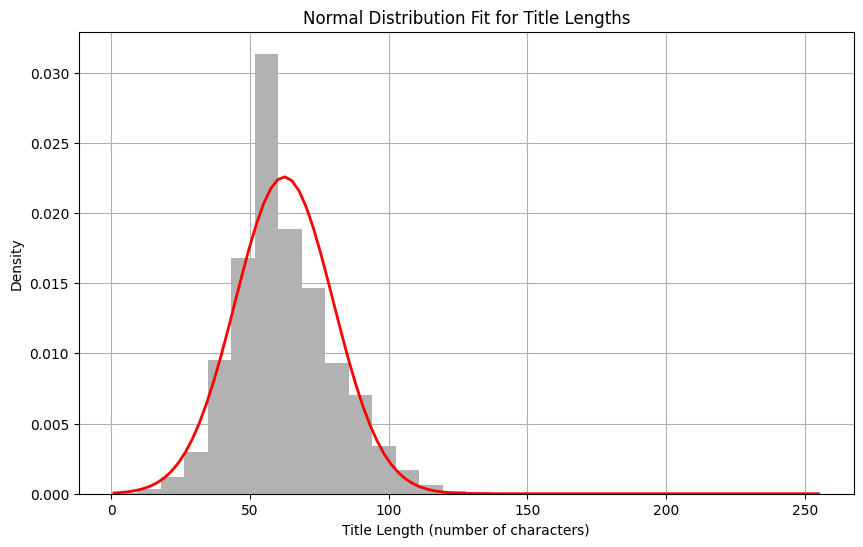

In [4]:
## Normal Distribution to Title Lengths

import matplotlib.pyplot as plt

data['title_length'] = data['TITLE'].apply(len)

# Calculate mean and standard deviation again for title lengths
mean_title_length = data['title_length'].mean()
std_title_length = data['title_length'].std()
mean_title_length,std_title_length
# Create a range of values for x (title length) and calculate the normal distribution manually
import numpy as np
x_normal = np.linspace(data['title_length'].min(), data['title_length'].max(), 100)
p_normal = (1 / (std_title_length * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_normal - mean_title_length) / std_title_length) ** 2)

# Plot the histogram and the normal distribution curve manually
plt.figure(figsize=(10, 6))
plt.hist(data['title_length'], bins=30, density=True, alpha=0.6, color='grey')
plt.plot(x_normal, p_normal, 'r', linewidth=2)
plt.title('Normal Distribution Fit for Title Lengths')
plt.xlabel('Title Length (number of characters)')
plt.ylabel('Density')
plt.grid(True)
plt.show()